In [7]:
import numpy as np
from matplotlib import pyplot as plt
import nifty5 as ift
from IPython.display import Image
import void_library as VL
import Pk_library as PKL

In [8]:
run_name_l1 = 'l1_evaluation'
run_name_l2 = 'l2_evaluation'
run_name_l_all = 'all_lx_evaluation'
run_name_gan = 'gan_l_inf'

In [9]:
path_to_sr_l1 = '/u/ivkos/sr/Output/{}/'.format(run_name_l1)
path_to_sr_l2 = '/u/ivkos/sr/Output/{}/'.format(run_name_l2)
path_to_sr_l_all = '/u/ivkos/sr/Output/{}/'.format(run_name_l_all)
path_to_gan = '/u/ivkos/sr/Output/{}/'.format(run_name_gan)
path_to_data = '/u/ivkos/sr/GriddedSimulationsTesting/'

In [10]:
def scale(data, epsilon=1e-9):
    return np.log(data+epsilon)/25
def unscale(data, epsilon=1e-9):
    return (np.exp(25*(data))-epsilon)

In [11]:
def take_slice(data, axis=0, slice_num=420):
    if axis == 0:
        slice_data = np.zeros(())
        return np.copy(data[slice_num,...])
    elif axis == 1:
        return np.copy(data[:,slice_num,:])
    else:
        return np.copy(data[:,:,slice_num])

In [6]:
sim256_grid512_path = path_to_data+'test256_grid512.npy'
sim512_grid512_path = path_to_data+'test512_grid512.npy' 
maxima_l1 = np.zeros(22)
averages_l1 = np.zeros(22)
medians_l1 = np.zeros(22)
stds_l1 = np.zeros(22)

maxima_l2 = np.zeros(22)
averages_l2 = np.zeros(22)
medians_l2 = np.zeros(22)
stds_l2 = np.zeros(22)

maxima_l_all = np.zeros(22)
averages_l_all = np.zeros(22)
medians_l_all = np.zeros(22)
stds_l_all = np.zeros(22)

for i in range(22):
    sr_path = path_to_sr_l1+'{}_sr_output_ckpt{}.npy'.format(run_name_l1, i+1)
    sim = np.load(sr_path)
    maxima_l1[i] = np.amax(sim)
    averages_l1[i] = np.average(sim)
    medians_l1[i] = np.median(sim)
    stds_l1[i] = np.std(sim)
    
    sr_path = path_to_sr_l2+'{}_sr_output_ckpt{}.npy'.format(run_name_l2, i+1)
    sim = np.load(sr_path)
    maxima_l2[i] = np.amax(sim)
    averages_l2[i] = np.average(sim)
    medians_l2[i] = np.median(sim)
    stds_l2[i] = np.std(sim)
    
    sr_path = path_to_sr_l_all+'{}_sr_output_ckpt{}.npy'.format(run_name_l_all, i+1)
    sim = np.load(sr_path)
    maxima_l_all[i] = np.amax(sim)
    averages_l_all[i] = np.average(sim)
    medians_l_all[i] = np.median(sim)
    stds_l_all[i] = np.std(sim)
    

    

KeyboardInterrupt: 

In [ ]:
maxima_gan = np.zeros(36)
averages_gan = np.zeros(36)
medians_gan = np.zeros(36)
stds_gan = np.zeros(36)


for i in range(36):
    sr_path = path_to_gan+'{}_sr_output_ckpt{}.npy'.format(run_name_gan, i+1)
    sim = np.load(sr_path)
    maxima_gan[i] = np.amax(sim)
    averages_gan[i] = np.average(sim)
    medians_gan[i] = np.median(sim)
    stds_gan[i] = np.std(sim)

In [12]:
sim = np.load(sim256_grid512_path)
maximum_lr = np.amax(sim)
average_lr = np.average(sim)
median_lr = np.median(sim)
std_lr = np.std(sim)
slice256_grid512 = take_slice(sim)

sim = np.load(sim512_grid512_path)   
maximum_hr = np.amax(sim)
average_hr = np.average(sim)
median_hr = np.median(sim)
std_hr = np.std(sim)
slice512_grid512 = take_slice(sim)

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(1,5*36, 5), medians_gan, 'r-', label='medians l1')

plt.plot(np.arange(1,5*36, 5), median_lr*np.ones(36), 'c-', label='median lr')
plt.plot(np.arange(1,5*36, 5), median_hr*np.ones(36), 'y-', label='median hr')
plt.xlabel('epoch', fontsize=35)
plt.ylabel('median', fontsize=35)
plt.tick_params(labelsize=25)
#plt.ticklabel_format(style='sci', scilimits = (0,0))
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(1,5*22, 5), medians_l1, 'r-', label='medians l1')
plt.plot(np.arange(1,5*22, 5), medians_l2, 'g-', label='medians l2')
plt.plot(np.arange(1,5*22, 5), medians_l_all, 'b-', label='medians all norms')
plt.plot(np.arange(1,5*22, 5), median_lr*np.ones(22), 'c-', label='median lr')
plt.plot(np.arange(1,5*22, 5), median_hr*np.ones(22), 'y-', label='median hr')
plt.xlabel('epoch', fontsize=35)
plt.ylabel('median', fontsize=35)
plt.tick_params(labelsize=25)
#plt.ticklabel_format(style='sci', scilimits = (0,0))
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(1,5*22, 5), averages_l1, 'r-', label='averages l1')
plt.plot(np.arange(1,5*22, 5), averages_l2, 'g-', label='averages l2')
plt.plot(np.arange(1,5*22, 5), averages_l_all, 'b-', label='averages all norms')
plt.plot(np.arange(1,5*22, 5), average_lr*np.ones(22), 'c-', label='average lr')
plt.plot(np.arange(1,5*22, 5), average_hr*np.ones(22), 'y-', label='average hr')
plt.xlabel('epoch', fontsize=35)
plt.ylabel('average', fontsize=35)
plt.tick_params(labelsize=25)
#plt.legend(prop={'size': 20})
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(1,5*36, 5), averages_gan, 'r-', label='medians l1')

plt.plot(np.arange(1,5*36, 5), average_lr*np.ones(36), 'c-', label='median lr')
plt.plot(np.arange(1,5*36, 5), average_hr*np.ones(36), 'y-', label='median hr')
plt.xlabel('epoch', fontsize=35)
plt.ylabel('average', fontsize=35)
plt.tick_params(labelsize=25)
#plt.ticklabel_format(style='sci', scilimits = (0,0))
plt.show()

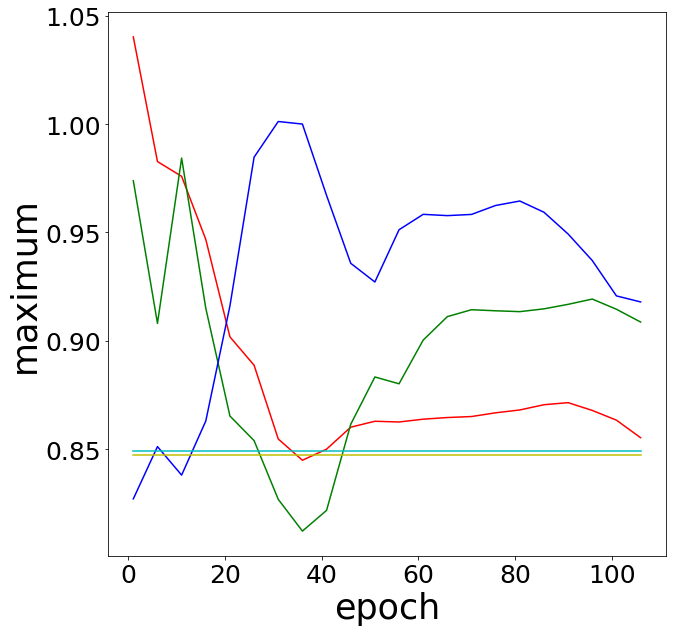

In [182]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(1,5*22, 5), maxima_l1, 'r-', label='maxima l1')
plt.plot(np.arange(1,5*22, 5), maxima_l2, 'g-', label='maxima l2')
plt.plot(np.arange(1,5*22, 5), maxima_l_all, 'b-', label='maxima all norms')
plt.plot(np.arange(1,5*22, 5), maximum_lr*np.ones(22), 'c-', label='maximum lr')
plt.plot(np.arange(1,5*22, 5), maximum_hr*np.ones(22), 'y-', label='maximum hr')
#plt.legend(prop={'size': 20})
plt.xlabel('epoch', fontsize=35)
plt.ylabel('maximum', fontsize=35)
plt.tick_params(labelsize=25)
plt.show()

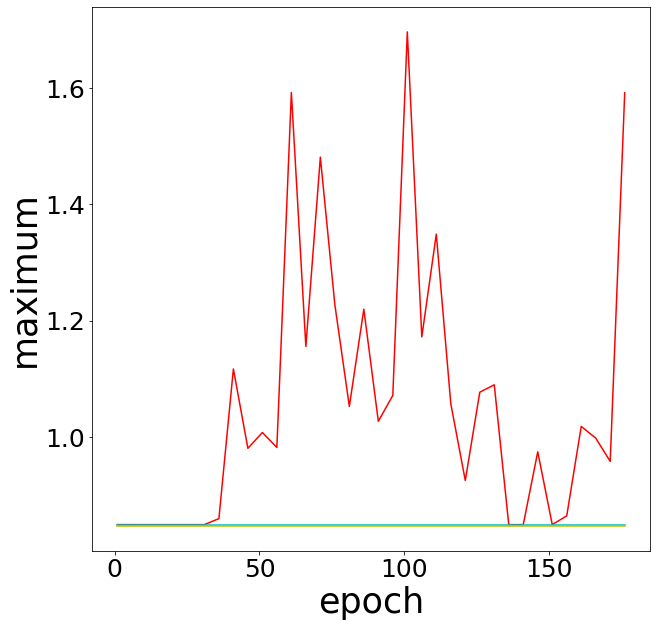

In [223]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(1,5*36, 5), maxima_gan, 'r-', label='medians l1')

plt.plot(np.arange(1,5*36, 5), maximum_lr*np.ones(36), 'c-', label='median lr')
plt.plot(np.arange(1,5*36, 5), maximum_hr*np.ones(36), 'y-', label='median hr')
plt.xlabel('epoch', fontsize=35)
plt.ylabel('maximum', fontsize=35)
plt.tick_params(labelsize=25)
#plt.ticklabel_format(style='sci', scilimits = (0,0))
plt.show()

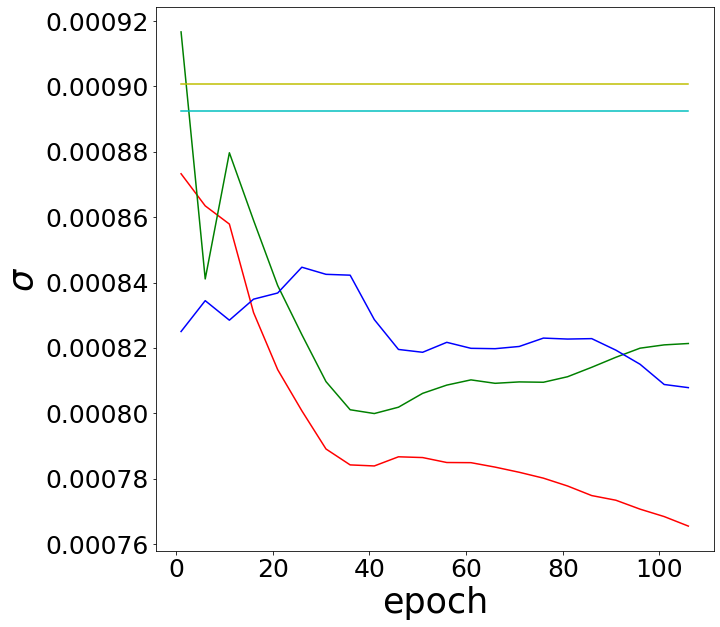

In [184]:
from IPython.display import display, Math, Latex

plt.figure(figsize=(10, 10))
plt.plot(np.arange(1,5*22, 5), stds_l1, 'r-', label=r'$\sigma_{l1}$')
plt.plot(np.arange(1,5*22, 5), stds_l2, 'g-', label=r'$\sigma_{l1}$')
plt.plot(np.arange(1,5*22, 5), stds_l_all, 'b-', label=r'$\sigma_{l1+l2+l_\infty}$')
plt.plot(np.arange(1,5*22, 5), std_lr*np.ones(22), 'c-', label=r'$\sigma_{lr}$')
plt.plot(np.arange(1,5*22, 5), std_hr*np.ones(22), 'y-', label=r'$\sigma_{hr}$')
plt.xlabel('epoch', fontsize=35)
plt.ylabel(r'$\sigma$', fontsize=35)
plt.tick_params(labelsize=25)
#plt.legend(prop={'size': 15})
plt.show()

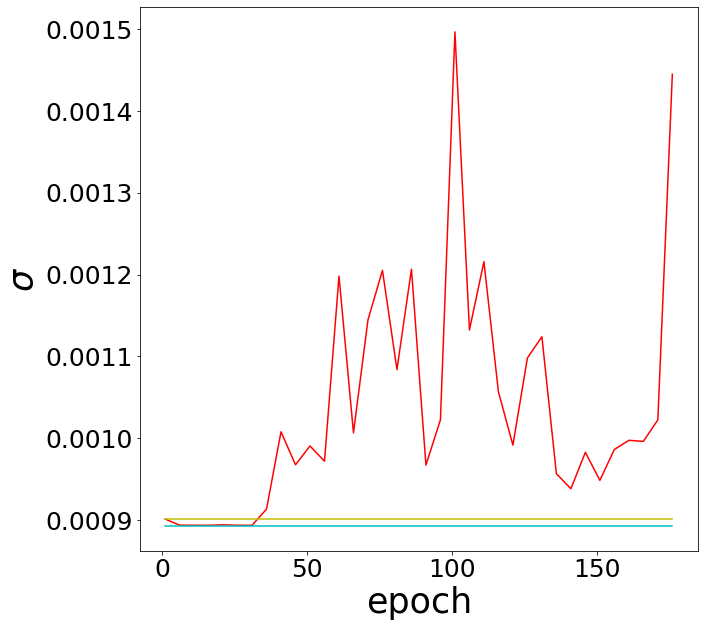

In [224]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(1,5*36, 5), stds_gan, 'r-', label='medians l1')

plt.plot(np.arange(1,5*36, 5), std_lr*np.ones(36), 'c-', label='median lr')
plt.plot(np.arange(1,5*36, 5), std_hr*np.ones(36), 'y-', label='median hr')
plt.xlabel('epoch', fontsize=35)
plt.ylabel(r'$\sigma$', fontsize=35)
plt.tick_params(labelsize=25)
#plt.ticklabel_format(style='sci', scilimits = (0,0))
plt.show()

In [13]:
sr_path_l1 = path_to_sr_l1+'{}_sr_output_ckpt{}.npy'.format(run_name_l1, 22)
sr_path_l2 = path_to_sr_l2+'{}_sr_output_ckpt{}.npy'.format(run_name_l2, 22)
sr_path_l_all = path_to_sr_l_all+'{}_sr_output_ckpt{}.npy'.format(run_name_l_all, 22)

In [25]:
def hist(data, min_value=-5., max_value=5.,bins=100):
    edges = np.logspace(min_value, max_value, bins+1)
    hist, _ = np.histogram(data,edges)
    midpoints = np.zeros(len(edges)-1)
    bin_widths = np.zeros(len(edges)-1)
    for i in range(len(midpoints)):
        midpoints[i] = np.power(10.,np.log10(edges[i])+np.log10(edges[i+1]/edges[i])/2)
        bin_widths[i] = edges[i+1]-edges[i]
    hist = hist/hist.sum()
    hist = hist/bin_widths
    return (midpoints, hist)

In [26]:
sim = scale(np.load(sim256_grid512_path))
lr_max = np.amax(sim)
delta =  (sim)/np.average(sim)
midpoints, histogram_256 = hist(delta)
del sim

In [30]:
sim = scale(np.load(sim512_grid512_path))
delta =  (sim)/np.average(sim)
midpoints, histogram_512 = hist(delta)
del sim

In [27]:
sim = scale(np.load(sr_path_l1))
delta =  (sim)/np.average(sim)
midpoints, histogram_l1 = hist(delta)
del sim

In [29]:
sim = scale(np.load(sr_path_l2))
delta =  (sim)/np.average(sim)
midpoints, histogram_l2 = hist(delta)
del sim

In [28]:
sim = scale(np.load(sr_path_l_all))
delta =  (sim)/np.average(sim)
midpoints, histogram_l_all = hist(delta)
del sim

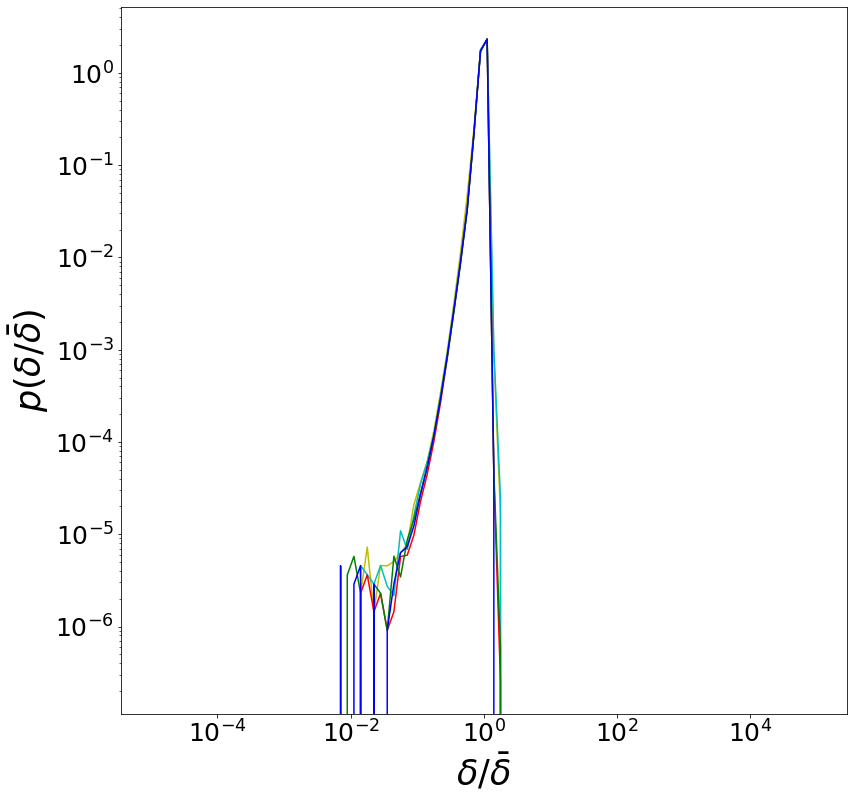

In [31]:
f = plt.figure(figsize=(13, 13))
plt.plot(midpoints, histogram_512, 'y-', label='sim512')
plt.plot(midpoints, histogram_256, 'c-', label='sim256')
plt.plot(midpoints, histogram_l1, 'r-', label='l1')
plt.plot(midpoints, histogram_l2, 'g-', label='l2')
plt.plot(midpoints, histogram_l_all, 'b-', label='l_all')
plt.xlabel(r'$\delta/\bar{\delta}$', fontsize=35)
plt.ylabel(r'$p(\delta/\bar{\delta})$', fontsize=35)
plt.tick_params(labelsize=25)
plt.yscale('log')
plt.xscale('log')
#plt.legend()
plt.show()

Plot the relative one point histograms

/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


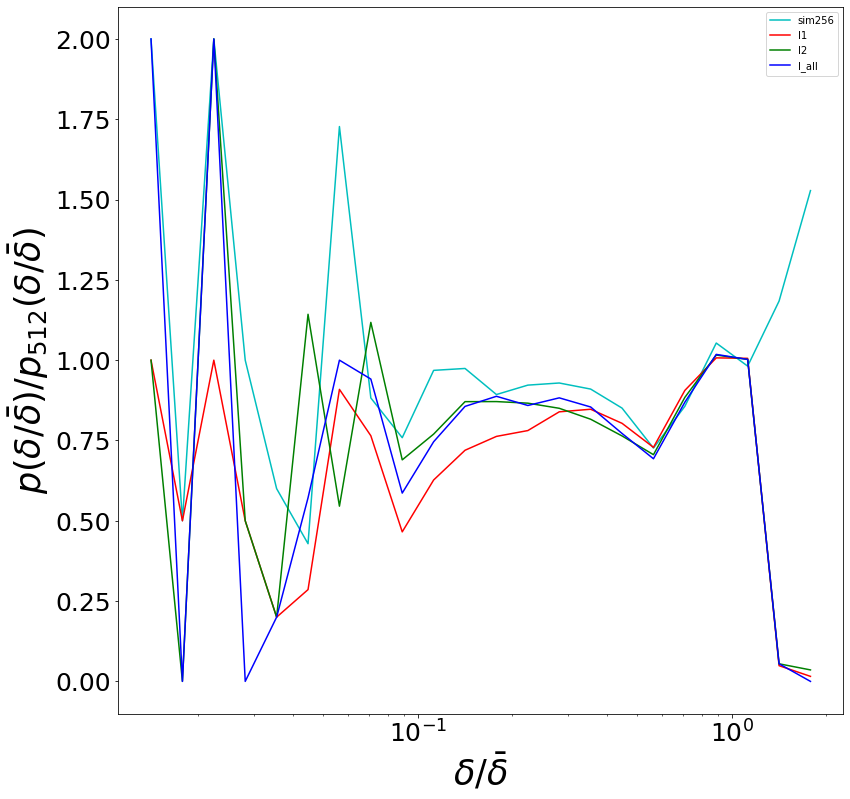

In [33]:
f = plt.figure(figsize=(13, 13))
plt.plot(midpoints, histogram_256/histogram_512, 'c-', label='sim256')
plt.plot(midpoints, histogram_l1/histogram_512, 'r-', label='l1')
plt.plot(midpoints, histogram_l2/histogram_512, 'g-', label='l2')
plt.plot(midpoints, histogram_l_all/histogram_512, 'b-', label='l_all')
plt.xlabel(r'$\delta/\bar{\delta}$', fontsize=35)
plt.ylabel(r'$p(\delta/\bar{\delta})/p_{512}(\delta/\bar{\delta})$', fontsize=35)
plt.tick_params(labelsize=25)
plt.xscale('log')
plt.legend()
plt.show()

In [14]:
def powerspectrum(delta,size=10, binsize=20):
    position_space = ift.RGSpace([delta.shape[0], delta.shape[1], delta.shape[2]], 
                                 distances=(size/delta.shape[0], 
                                            size/delta.shape[1], size/delta.shape[2]))
    harmonic_space = position_space.get_default_codomain()
    HT = ift.HartleyOperator(harmonic_space, position_space)
    image = ift.Field.from_global_data(position_space, delta)
    ht_image = HT.inverse(image)
    power_spec = ift.power_analyze(ht_image)
    k_values = power_spec.domain[0].k_lengths
    power_spec = ift.Field.to_global_data(power_spec)
    binned_k = []
    binned_power_spec = []
    binsize = 10
    for i in range(int(power_spec.shape[0]/binsize)):
        binned_k.append(np.average(k_values[i*binsize:(i+1)*binsize]))
        binned_power_spec.append(np.average(power_spec[i*binsize:(i+1)*binsize]))

    spectrum = np.zeros((2, len(binned_k)))
    spectrum[0, ...] = binned_k
    spectrum[1, ...] = binned_power_spec
    return (spectrum[0,...], spectrum[1,...]/size**3)

In [15]:
sim = scale(np.load(sim512_grid512_path))
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k, proj_power_512 = powerspectrum(delta)

In [16]:
sim = scale(np.load(sim256_grid512_path))
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k, proj_power_256  = powerspectrum(delta)

In [17]:
sim = scale(np.load(sr_path_l1))
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k, proj_power_l1 = powerspectrum(delta)

In [18]:
sim = scale(np.load(sr_path_l2))
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k, proj_power_l2 = powerspectrum(delta)

In [19]:
sim = scale(np.load(sr_path_l_all))
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k, proj_power_l_all = powerspectrum(delta)

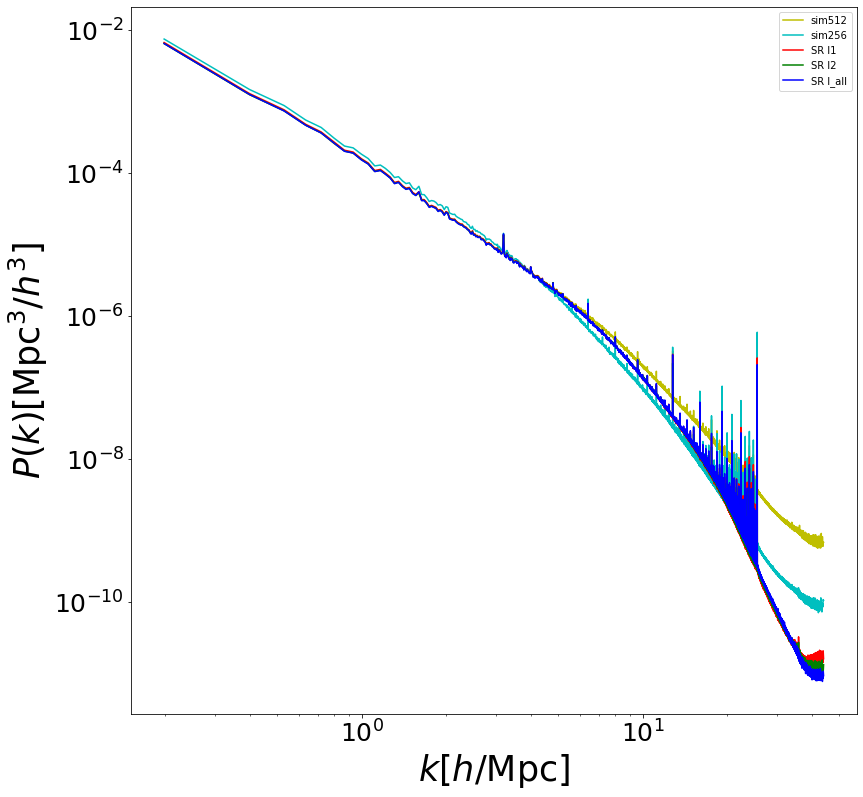

In [23]:
f = plt.figure(figsize=(13, 13))
plt.plot(k, proj_power_512, 'y-', label='sim512')
plt.plot(k, proj_power_256, 'c-', label='sim256')
plt.plot(k, proj_power_l1, 'r-', label='SR l1')
plt.plot(k, proj_power_l2, 'g-', label='SR l2')
plt.plot(k, proj_power_l_all, 'b-', label='SR l_all')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$k[h/\mathrm{Mpc}]$', fontsize=35)
plt.ylabel(r'$P(k)[\mathrm{Mpc}^3/h^3]$', fontsize=35)
plt.tick_params(labelsize=25)
plt.legend()
plt.show()

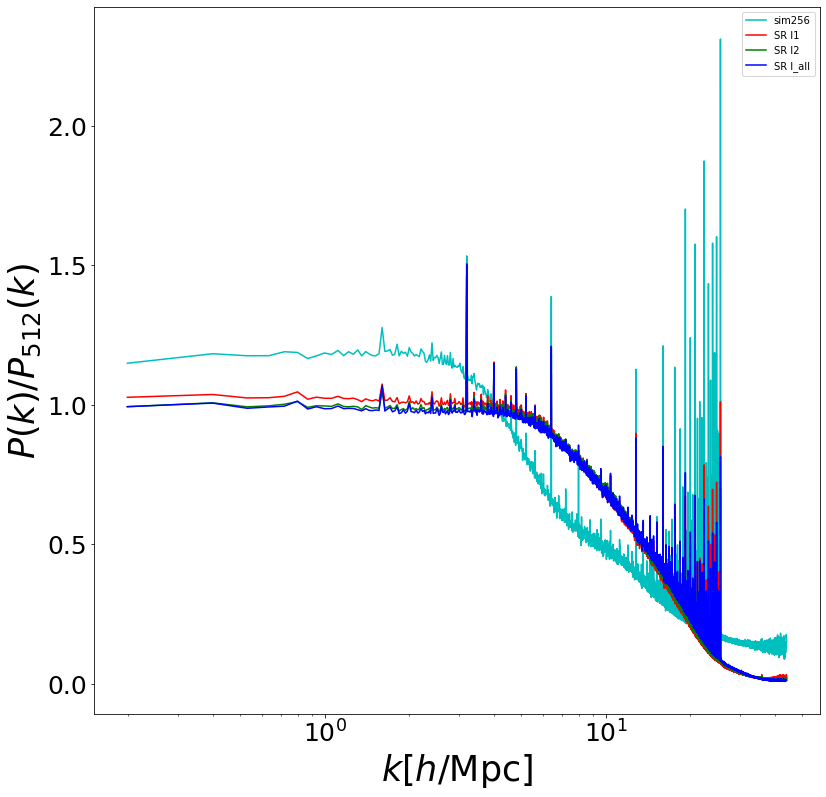

In [22]:
f = plt.figure(figsize=(13, 13))
plt.plot(k, proj_power_256/proj_power_512, 'c-', label='sim256')
plt.plot(k, proj_power_l1/proj_power_512, 'r-', label='SR l1')
plt.plot(k, proj_power_l2/proj_power_512, 'g-', label='SR l2')
plt.plot(k, proj_power_l_all/proj_power_512, 'b-', label='SR l_all')
plt.xscale('log')
plt.xlabel(r'$k[h/\mathrm{Mpc}]$', fontsize=35)
plt.ylabel(r'$P(k)/P_{512}(k)$', fontsize=35)
plt.tick_params(labelsize=25)
plt.legend()
plt.show()

In [147]:
def get_vsf(sim, box_size=10., radii=10/512*np.arange(5, 65, 1, dtype=np.float32)):
    # parameters of the void finder
    delta = (sim-np.average(sim))/np.average(sim)
    BoxSize    = box_size
    threshold  = -0.7
    Radii      = radii
    threads1   = 16
    threads2   = 4
    void_field = False
    Voids = VL.void_finder(delta, BoxSize, threshold, Radii, threads1, threads2, void_field=False)
    return (Voids.Rbins, Voids.void_vsf)

In [148]:
vsf_512 = get_vsf(np.load(sim512_grid512_path))

maximum number of voids = 256336

Smoothing field with top-hat filter of radius 1.25
Density smoothing took 1.409 seconds
Searching underdense cells took 0.120 seconds
Found 05993396 cells below threshold
Sorting took 0.728 seconds
Mode = 0    :   Ncells = 65   :   threads = 4
Found 000013 voids with radius R =1.250 Mpc/h
Found 000013 voids with radius R>=1.250 Mpc/h
Void volume filling fraction = 1.063e-01
Expected    filling fraction = 1.064e-01
Time1 = 5.454 seconds
Time2 = 0.071 seconds
void finding took 6.499 seconds

Smoothing field with top-hat filter of radius 1.23
Density smoothing took 1.233 seconds
Searching underdense cells took 0.108 seconds
Found 02171705 cells below threshold
Sorting took 0.226 seconds
Mode = 0    :   Ncells = 64   :   threads = 4
Found 000000 voids with radius R =1.230 Mpc/h
Found 000013 voids with radius R>=1.230 Mpc/h
Void volume filling fraction = 1.063e-01
Expected    filling fraction = 1.064e-01
Time1 = 4.190 seconds
Time2 = 0.000 seconds
void find

Density smoothing took 1.238 seconds
Searching underdense cells took 0.111 seconds
Found 03068368 cells below threshold
Sorting took 0.331 seconds
Mode = 0    :   Ncells = 48   :   threads = 4
Found 000002 voids with radius R =0.918 Mpc/h
Found 000031 voids with radius R>=0.918 Mpc/h
Void volume filling fraction = 1.879e-01
Expected    filling fraction = 1.880e-01
Time1 = 6.369 seconds
Time2 = 0.003 seconds
void finding took 7.094 seconds

Smoothing field with top-hat filter of radius 0.90
Density smoothing took 1.171 seconds
Searching underdense cells took 0.111 seconds
Found 03045734 cells below threshold
Sorting took 0.330 seconds
Mode = 0    :   Ncells = 47   :   threads = 4
Found 000001 voids with radius R =0.898 Mpc/h
Found 000032 voids with radius R>=0.898 Mpc/h
Void volume filling fraction = 1.909e-01
Expected    filling fraction = 1.910e-01
Time1 = 6.397 seconds
Time2 = 0.001 seconds
void finding took 7.134 seconds

Smoothing field with top-hat filter of radius 0.88
Density sm

Density smoothing took 1.198 seconds
Searching underdense cells took 0.122 seconds
Found 04367564 cells below threshold
Sorting took 0.507 seconds
Mode = 0    :   Ncells = 31   :   threads = 4
Found 000011 voids with radius R =0.586 Mpc/h
Found 000126 voids with radius R>=0.586 Mpc/h
Void volume filling fraction = 3.306e-01
Expected    filling fraction = 3.309e-01
Time1 = 9.452 seconds
Time2 = 0.005 seconds
void finding took 10.426 seconds

Smoothing field with top-hat filter of radius 0.57
Density smoothing took 1.172 seconds
Searching underdense cells took 0.125 seconds
Found 04499197 cells below threshold
Sorting took 0.520 seconds
Mode = 0    :   Ncells = 30   :   threads = 4
Found 000006 voids with radius R =0.566 Mpc/h
Found 000132 voids with radius R>=0.566 Mpc/h
Void volume filling fraction = 3.351e-01
Expected    filling fraction = 3.355e-01
Time1 = 10.252 seconds
Time2 = 0.002 seconds
void finding took 11.234 seconds

Smoothing field with top-hat filter of radius 0.55
Density

Density smoothing took 1.161 seconds
Searching underdense cells took 0.158 seconds
Found 08257365 cells below threshold
Sorting took 1.111 seconds
Mode = 0    :   Ncells = 14   :   threads = 4
Found 000153 voids with radius R =0.254 Mpc/h
Found 001033 voids with radius R>=0.254 Mpc/h
Void volume filling fraction = 4.900e-01
Expected    filling fraction = 4.912e-01
Time1 = 22.484 seconds
Time2 = 0.007 seconds
void finding took 24.229 seconds

Smoothing field with top-hat filter of radius 0.23
Density smoothing took 1.218 seconds
Searching underdense cells took 0.162 seconds
Found 08680991 cells below threshold
Sorting took 1.190 seconds
Mode = 0    :   Ncells = 13   :   threads = 4
Found 000232 voids with radius R =0.234 Mpc/h
Found 001265 voids with radius R>=0.234 Mpc/h
Void volume filling fraction = 5.023e-01
Expected    filling fraction = 5.037e-01
Time1 = 26.284 seconds
Time2 = 0.008 seconds
void finding took 28.094 seconds

Smoothing field with top-hat filter of radius 0.21
Densit

In [149]:
vsf_256 = get_vsf(np.load(sim256_grid512_path))

maximum number of voids = 256336

Smoothing field with top-hat filter of radius 1.25
Density smoothing took 1.204 seconds
Searching underdense cells took 0.113 seconds
Found 06073293 cells below threshold
Sorting took 0.696 seconds
Mode = 0    :   Ncells = 65   :   threads = 4
Found 000013 voids with radius R =1.250 Mpc/h
Found 000013 voids with radius R>=1.250 Mpc/h
Void volume filling fraction = 1.063e-01
Expected    filling fraction = 1.064e-01
Time1 = 5.589 seconds
Time2 = 0.070 seconds
void finding took 6.417 seconds

Smoothing field with top-hat filter of radius 1.23
Density smoothing took 1.197 seconds
Searching underdense cells took 0.103 seconds
Found 02251202 cells below threshold
Sorting took 0.229 seconds
Mode = 0    :   Ncells = 64   :   threads = 4
Found 000000 voids with radius R =1.230 Mpc/h
Found 000013 voids with radius R>=1.230 Mpc/h
Void volume filling fraction = 1.063e-01
Expected    filling fraction = 1.064e-01
Time1 = 4.771 seconds
Time2 = 0.000 seconds
void find

Density smoothing took 1.169 seconds
Searching underdense cells took 0.104 seconds
Found 02999811 cells below threshold
Sorting took 0.302 seconds
Mode = 0    :   Ncells = 48   :   threads = 4
Found 000003 voids with radius R =0.918 Mpc/h
Found 000031 voids with radius R>=0.918 Mpc/h
Void volume filling fraction = 1.883e-01
Expected    filling fraction = 1.884e-01
Time1 = 6.622 seconds
Time2 = 0.004 seconds
void finding took 7.217 seconds

Smoothing field with top-hat filter of radius 0.90
Density smoothing took 1.166 seconds
Searching underdense cells took 0.106 seconds
Found 03058330 cells below threshold
Sorting took 0.304 seconds
Mode = 0    :   Ncells = 47   :   threads = 4
Found 000001 voids with radius R =0.898 Mpc/h
Found 000032 voids with radius R>=0.898 Mpc/h
Void volume filling fraction = 1.913e-01
Expected    filling fraction = 1.914e-01
Time1 = 6.856 seconds
Time2 = 0.001 seconds
void finding took 7.490 seconds

Smoothing field with top-hat filter of radius 0.88
Density sm

Density smoothing took 1.165 seconds
Searching underdense cells took 0.117 seconds
Found 04639130 cells below threshold
Sorting took 0.507 seconds
Mode = 0    :   Ncells = 31   :   threads = 4
Found 000010 voids with radius R =0.586 Mpc/h
Found 000122 voids with radius R>=0.586 Mpc/h
Void volume filling fraction = 3.261e-01
Expected    filling fraction = 3.264e-01
Time1 = 11.345 seconds
Time2 = 0.004 seconds
void finding took 12.187 seconds

Smoothing field with top-hat filter of radius 0.57
Density smoothing took 1.180 seconds
Searching underdense cells took 0.118 seconds
Found 04745436 cells below threshold
Sorting took 0.518 seconds
Mode = 0    :   Ncells = 30   :   threads = 4
Found 000010 voids with radius R =0.566 Mpc/h
Found 000132 voids with radius R>=0.566 Mpc/h
Void volume filling fraction = 3.337e-01
Expected    filling fraction = 3.340e-01
Time1 = 11.783 seconds
Time2 = 0.004 seconds
void finding took 12.675 seconds

Smoothing field with top-hat filter of radius 0.55
Densit

Density smoothing took 1.254 seconds
Searching underdense cells took 0.158 seconds
Found 08301821 cells below threshold
Sorting took 1.107 seconds
Mode = 0    :   Ncells = 14   :   threads = 4
Found 000165 voids with radius R =0.254 Mpc/h
Found 001019 voids with radius R>=0.254 Mpc/h
Void volume filling fraction = 4.873e-01
Expected    filling fraction = 4.885e-01
Time1 = 26.155 seconds
Time2 = 0.007 seconds
void finding took 27.810 seconds

Smoothing field with top-hat filter of radius 0.23
Density smoothing took 1.160 seconds
Searching underdense cells took 0.152 seconds
Found 08668253 cells below threshold
Sorting took 1.117 seconds
Mode = 0    :   Ncells = 13   :   threads = 4
Found 000237 voids with radius R =0.234 Mpc/h
Found 001256 voids with radius R>=0.234 Mpc/h
Void volume filling fraction = 4.999e-01
Expected    filling fraction = 5.013e-01
Time1 = 28.285 seconds
Time2 = 0.008 seconds
void finding took 29.993 seconds

Smoothing field with top-hat filter of radius 0.21
Densit

In [151]:
vsf_l1 = get_vsf(np.load(sr_path_l1))

maximum number of voids = 256336

Smoothing field with top-hat filter of radius 1.25
Density smoothing took 1.211 seconds
Searching underdense cells took 0.106 seconds
Found 04984541 cells below threshold
Sorting took 0.530 seconds
Mode = 0    :   Ncells = 65   :   threads = 4
Found 000013 voids with radius R =1.250 Mpc/h
Found 000013 voids with radius R>=1.250 Mpc/h
Void volume filling fraction = 1.063e-01
Expected    filling fraction = 1.064e-01
Time1 = 4.260 seconds
Time2 = 0.068 seconds
void finding took 5.118 seconds

Smoothing field with top-hat filter of radius 1.23
Density smoothing took 1.273 seconds
Searching underdense cells took 0.097 seconds
Found 01832550 cells below threshold
Sorting took 0.173 seconds
Mode = 0    :   Ncells = 64   :   threads = 4
Found 000001 voids with radius R =1.230 Mpc/h
Found 000014 voids with radius R>=1.230 Mpc/h
Void volume filling fraction = 1.141e-01
Expected    filling fraction = 1.142e-01
Time1 = 3.141 seconds
Time2 = 0.003 seconds
void find

Density smoothing took 1.241 seconds
Searching underdense cells took 0.104 seconds
Found 02348779 cells below threshold
Sorting took 0.233 seconds
Mode = 0    :   Ncells = 48   :   threads = 4
Found 000003 voids with radius R =0.918 Mpc/h
Found 000029 voids with radius R>=0.918 Mpc/h
Void volume filling fraction = 1.793e-01
Expected    filling fraction = 1.793e-01
Time1 = 4.053 seconds
Time2 = 0.005 seconds
void finding took 4.619 seconds

Smoothing field with top-hat filter of radius 0.90
Density smoothing took 1.265 seconds
Searching underdense cells took 0.103 seconds
Found 02383867 cells below threshold
Sorting took 0.232 seconds
Mode = 0    :   Ncells = 47   :   threads = 4
Found 000003 voids with radius R =0.898 Mpc/h
Found 000032 voids with radius R>=0.898 Mpc/h
Void volume filling fraction = 1.884e-01
Expected    filling fraction = 1.885e-01
Time1 = 4.063 seconds
Time2 = 0.004 seconds
void finding took 4.648 seconds

Smoothing field with top-hat filter of radius 0.88
Density sm

Density smoothing took 1.279 seconds
Searching underdense cells took 0.114 seconds
Found 03675418 cells below threshold
Sorting took 0.393 seconds
Mode = 0    :   Ncells = 31   :   threads = 4
Found 000007 voids with radius R =0.586 Mpc/h
Found 000113 voids with radius R>=0.586 Mpc/h
Void volume filling fraction = 3.067e-01
Expected    filling fraction = 3.070e-01
Time1 = 6.268 seconds
Time2 = 0.003 seconds
void finding took 6.984 seconds

Smoothing field with top-hat filter of radius 0.57
Density smoothing took 1.237 seconds
Searching underdense cells took 0.116 seconds
Found 03825723 cells below threshold
Sorting took 0.409 seconds
Mode = 0    :   Ncells = 30   :   threads = 4
Found 000011 voids with radius R =0.566 Mpc/h
Found 000124 voids with radius R>=0.566 Mpc/h
Void volume filling fraction = 3.150e-01
Expected    filling fraction = 3.153e-01
Time1 = 6.329 seconds
Time2 = 0.004 seconds
void finding took 7.275 seconds

Smoothing field with top-hat filter of radius 0.55
Density sm

Density smoothing took 1.241 seconds
Searching underdense cells took 0.145 seconds
Found 07465807 cells below threshold
Sorting took 0.928 seconds
Mode = 0    :   Ncells = 14   :   threads = 4
Found 000163 voids with radius R =0.254 Mpc/h
Found 001025 voids with radius R>=0.254 Mpc/h
Void volume filling fraction = 4.684e-01
Expected    filling fraction = 4.696e-01
Time1 = 22.228 seconds
Time2 = 0.007 seconds
void finding took 23.950 seconds

Smoothing field with top-hat filter of radius 0.23
Density smoothing took 1.217 seconds
Searching underdense cells took 0.148 seconds
Found 07816031 cells below threshold
Sorting took 0.986 seconds
Mode = 0    :   Ncells = 13   :   threads = 4
Found 000224 voids with radius R =0.234 Mpc/h
Found 001249 voids with radius R>=0.234 Mpc/h
Void volume filling fraction = 4.803e-01
Expected    filling fraction = 4.817e-01
Time1 = 21.079 seconds
Time2 = 0.008 seconds
void finding took 22.972 seconds

Smoothing field with top-hat filter of radius 0.21
Densit

In [152]:
vsf_l2 = get_vsf(np.load(sr_path_l2))

maximum number of voids = 256336

Smoothing field with top-hat filter of radius 1.25
Density smoothing took 1.216 seconds
Searching underdense cells took 0.106 seconds
Found 04859433 cells below threshold
Sorting took 0.505 seconds
Mode = 0    :   Ncells = 65   :   threads = 4
Found 000012 voids with radius R =1.250 Mpc/h
Found 000012 voids with radius R>=1.250 Mpc/h
Void volume filling fraction = 9.816e-02
Expected    filling fraction = 9.817e-02
Time1 = 4.319 seconds
Time2 = 0.064 seconds
void finding took 4.955 seconds

Smoothing field with top-hat filter of radius 1.23
Density smoothing took 1.273 seconds
Searching underdense cells took 0.097 seconds
Found 01787080 cells below threshold
Sorting took 0.169 seconds
Mode = 0    :   Ncells = 64   :   threads = 4
Found 000002 voids with radius R =1.230 Mpc/h
Found 000014 voids with radius R>=1.230 Mpc/h
Void volume filling fraction = 1.138e-01
Expected    filling fraction = 1.138e-01
Time1 = 3.368 seconds
Time2 = 0.008 seconds
void find

Density smoothing took 1.236 seconds
Searching underdense cells took 0.102 seconds
Found 02211705 cells below threshold
Sorting took 0.210 seconds
Mode = 0    :   Ncells = 48   :   threads = 4
Found 000003 voids with radius R =0.918 Mpc/h
Found 000030 voids with radius R>=0.918 Mpc/h
Void volume filling fraction = 1.816e-01
Expected    filling fraction = 1.817e-01
Time1 = 4.382 seconds
Time2 = 0.005 seconds
void finding took 4.823 seconds

Smoothing field with top-hat filter of radius 0.90
Density smoothing took 1.215 seconds
Searching underdense cells took 0.103 seconds
Found 02194255 cells below threshold
Sorting took 0.214 seconds
Mode = 0    :   Ncells = 47   :   threads = 4
Found 000001 voids with radius R =0.898 Mpc/h
Found 000031 voids with radius R>=0.898 Mpc/h
Void volume filling fraction = 1.846e-01
Expected    filling fraction = 1.847e-01
Time1 = 4.357 seconds
Time2 = 0.001 seconds
void finding took 4.800 seconds

Smoothing field with top-hat filter of radius 0.88
Density sm

Density smoothing took 1.238 seconds
Searching underdense cells took 0.114 seconds
Found 03571440 cells below threshold
Sorting took 0.376 seconds
Mode = 0    :   Ncells = 31   :   threads = 4
Found 000007 voids with radius R =0.586 Mpc/h
Found 000111 voids with radius R>=0.586 Mpc/h
Void volume filling fraction = 3.019e-01
Expected    filling fraction = 3.022e-01
Time1 = 7.407 seconds
Time2 = 0.003 seconds
void finding took 8.106 seconds

Smoothing field with top-hat filter of radius 0.57
Density smoothing took 1.231 seconds
Searching underdense cells took 0.115 seconds
Found 03711292 cells below threshold
Sorting took 0.400 seconds
Mode = 0    :   Ncells = 30   :   threads = 4
Found 000010 voids with radius R =0.566 Mpc/h
Found 000121 voids with radius R>=0.566 Mpc/h
Void volume filling fraction = 3.094e-01
Expected    filling fraction = 3.098e-01
Time1 = 7.457 seconds
Time2 = 0.004 seconds
void finding took 8.115 seconds

Smoothing field with top-hat filter of radius 0.55
Density sm

Density smoothing took 1.242 seconds
Searching underdense cells took 0.151 seconds
Found 07302684 cells below threshold
Sorting took 0.989 seconds
Mode = 0    :   Ncells = 14   :   threads = 4
Found 000171 voids with radius R =0.254 Mpc/h
Found 001034 voids with radius R>=0.254 Mpc/h
Void volume filling fraction = 4.650e-01
Expected    filling fraction = 4.662e-01
Time1 = 21.783 seconds
Time2 = 0.007 seconds
void finding took 23.278 seconds

Smoothing field with top-hat filter of radius 0.23
Density smoothing took 1.294 seconds
Searching underdense cells took 0.169 seconds
Found 07640660 cells below threshold
Sorting took 0.947 seconds
Mode = 0    :   Ncells = 13   :   threads = 4
Found 000219 voids with radius R =0.234 Mpc/h
Found 001253 voids with radius R>=0.234 Mpc/h
Void volume filling fraction = 4.766e-01
Expected    filling fraction = 4.780e-01
Time1 = 22.912 seconds
Time2 = 0.008 seconds
void finding took 24.588 seconds

Smoothing field with top-hat filter of radius 0.21
Densit

In [153]:
vsf_l_all = get_vsf(np.load(sr_path_l_all))

maximum number of voids = 256336

Smoothing field with top-hat filter of radius 1.25
Density smoothing took 1.255 seconds
Searching underdense cells took 0.107 seconds
Found 05034480 cells below threshold
Sorting took 0.536 seconds
Mode = 0    :   Ncells = 65   :   threads = 4
Found 000013 voids with radius R =1.250 Mpc/h
Found 000013 voids with radius R>=1.250 Mpc/h
Void volume filling fraction = 1.063e-01
Expected    filling fraction = 1.064e-01
Time1 = 3.546 seconds
Time2 = 0.068 seconds
void finding took 4.416 seconds

Smoothing field with top-hat filter of radius 1.23
Density smoothing took 1.301 seconds
Searching underdense cells took 0.096 seconds
Found 01852507 cells below threshold
Sorting took 0.177 seconds
Mode = 0    :   Ncells = 64   :   threads = 4
Found 000001 voids with radius R =1.230 Mpc/h
Found 000014 voids with radius R>=1.230 Mpc/h
Void volume filling fraction = 1.141e-01
Expected    filling fraction = 1.142e-01
Time1 = 2.766 seconds
Time2 = 0.003 seconds
void find

Density smoothing took 1.252 seconds
Searching underdense cells took 0.103 seconds
Found 02158915 cells below threshold
Sorting took 0.213 seconds
Mode = 0    :   Ncells = 48   :   threads = 4
Found 000002 voids with radius R =0.918 Mpc/h
Found 000030 voids with radius R>=0.918 Mpc/h
Void volume filling fraction = 1.829e-01
Expected    filling fraction = 1.830e-01
Time1 = 3.817 seconds
Time2 = 0.003 seconds
void finding took 4.431 seconds

Smoothing field with top-hat filter of radius 0.90
Density smoothing took 1.233 seconds
Searching underdense cells took 0.102 seconds
Found 02256370 cells below threshold
Sorting took 0.219 seconds
Mode = 0    :   Ncells = 47   :   threads = 4
Found 000001 voids with radius R =0.898 Mpc/h
Found 000031 voids with radius R>=0.898 Mpc/h
Void volume filling fraction = 1.859e-01
Expected    filling fraction = 1.860e-01
Time1 = 4.046 seconds
Time2 = 0.001 seconds
void finding took 4.683 seconds

Smoothing field with top-hat filter of radius 0.88
Density sm

Density smoothing took 1.252 seconds
Searching underdense cells took 0.111 seconds
Found 03734522 cells below threshold
Sorting took 0.389 seconds
Mode = 0    :   Ncells = 31   :   threads = 4
Found 000009 voids with radius R =0.586 Mpc/h
Found 000112 voids with radius R>=0.586 Mpc/h
Void volume filling fraction = 3.052e-01
Expected    filling fraction = 3.055e-01
Time1 = 6.610 seconds
Time2 = 0.004 seconds
void finding took 7.584 seconds

Smoothing field with top-hat filter of radius 0.57
Density smoothing took 1.204 seconds
Searching underdense cells took 0.115 seconds
Found 03796156 cells below threshold
Sorting took 0.398 seconds
Mode = 0    :   Ncells = 30   :   threads = 4
Found 000010 voids with radius R =0.566 Mpc/h
Found 000122 voids with radius R>=0.566 Mpc/h
Void volume filling fraction = 3.128e-01
Expected    filling fraction = 3.131e-01
Time1 = 6.679 seconds
Time2 = 0.004 seconds
void finding took 7.630 seconds

Smoothing field with top-hat filter of radius 0.55
Density sm

Density smoothing took 1.284 seconds
Searching underdense cells took 0.144 seconds
Found 07301941 cells below threshold
Sorting took 0.914 seconds
Mode = 0    :   Ncells = 14   :   threads = 4
Found 000162 voids with radius R =0.254 Mpc/h
Found 001022 voids with radius R>=0.254 Mpc/h
Void volume filling fraction = 4.673e-01
Expected    filling fraction = 4.685e-01
Time1 = 17.044 seconds
Time2 = 0.007 seconds
void finding took 18.752 seconds

Smoothing field with top-hat filter of radius 0.23
Density smoothing took 1.224 seconds
Searching underdense cells took 0.147 seconds
Found 07664654 cells below threshold
Sorting took 0.972 seconds
Mode = 0    :   Ncells = 13   :   threads = 4
Found 000219 voids with radius R =0.234 Mpc/h
Found 001241 voids with radius R>=0.234 Mpc/h
Void volume filling fraction = 4.790e-01
Expected    filling fraction = 4.803e-01
Time1 = 18.712 seconds
Time2 = 0.007 seconds
void finding took 20.580 seconds

Smoothing field with top-hat filter of radius 0.21
Densit

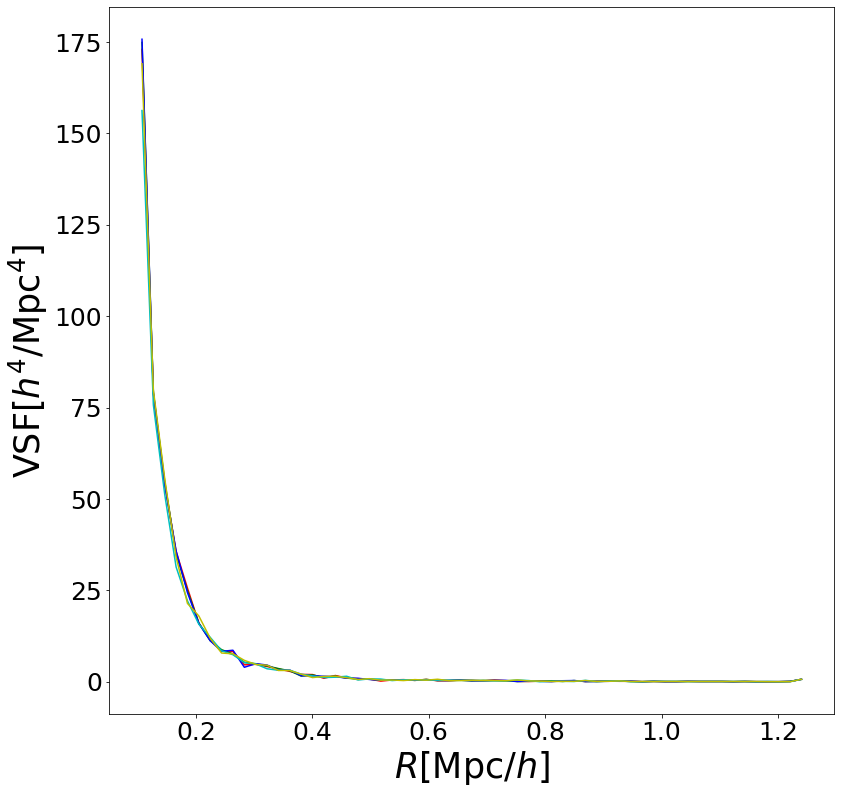

In [204]:
f = plt.figure(figsize=(13, 13))
plt.plot(vsf_512[0],vsf_l1[1], 'r-', label='voids l1')
plt.plot(vsf_512[0],vsf_l2[1], 'g-', label='voids l2')
plt.plot(vsf_512[0],vsf_l_all[1], 'b-', label='voids l_all')
plt.plot(vsf_512[0],vsf_256[1], 'c-', label='voids 256')
plt.plot(vsf_512[0],vsf_512[1], 'y-', label='voids 512')
plt.xlabel(r'$R[\mathrm{Mpc}/h]$', fontsize=35)
plt.ylabel(r'VSF$[h^4/\mathrm{Mpc}^4]$', fontsize=35)
plt.tick_params(labelsize=25)
plt.show()

/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launch

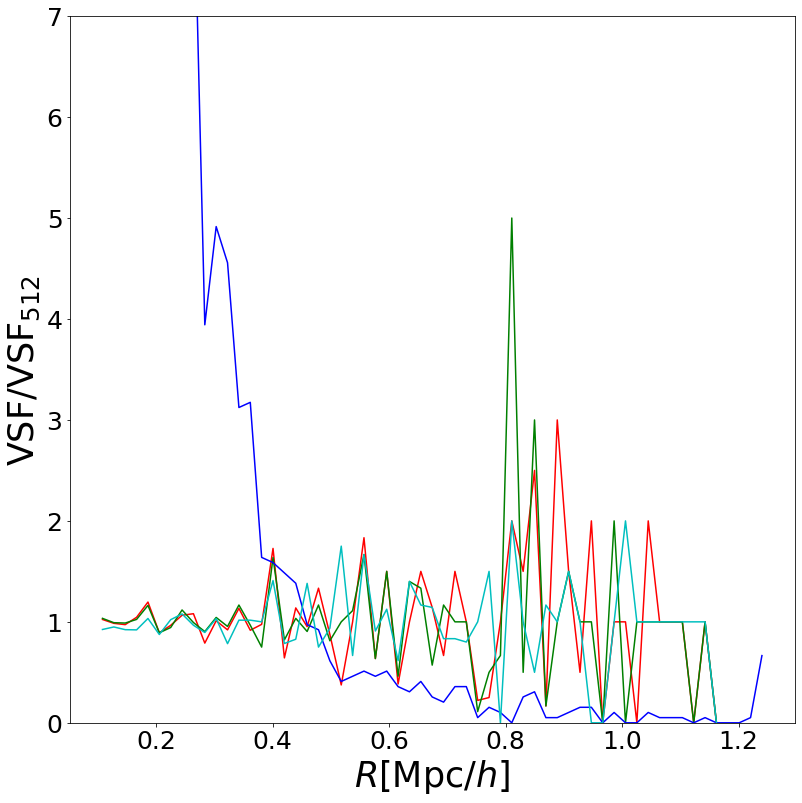

In [210]:
f = plt.figure(figsize=(13, 13))

plt.plot(vsf_512[0],vsf_l1[1]/vsf_512[1], 'r-', label='voids l1')
plt.plot(vsf_512[0],vsf_l2[1]/vsf_512[1], 'g-', label='voids l2')
plt.plot(vsf_512[0],vsf_l_all[1], 'b-', label='voids l_all')
plt.plot(vsf_512[0],vsf_256[1]/vsf_512[1], 'c-', label='256')

plt.ylim(0.0,7)
plt.xlabel(r'$R[\mathrm{Mpc}/h]$', fontsize=35)
plt.ylabel(r'$\mathrm{VSF}/\mathrm{VSF}_{512}$', fontsize=35)
plt.tick_params(labelsize=25)

plt.show()

In [22]:
def replace_overdensities(sr_sim, lr_sim, regularizer=10.):
    overdensity = np.greater(sr_sim, regularizer*np.average(lr_sim))
    print(overdensity.sum()/512**3)
    corrected_sr = np.logical_not(overdensity)*sr_sim+overdensity*lr_sim
    return corrected_sr

In [30]:
def replace_underdensities(sr_sim, lr_sim, regularizer=0.01):
    underdensity = np.less(sr_sim, regularizer*np.average(lr_sim))
    print(underdensity.sum()/512**3)
    corrected_sr = np.logical_not(underdensity)*sr_sim+underdensity*lr_sim
    return corrected_sr

In [89]:
sim = np.load(sr_path_l1)
lr_sim = scale(np.load(sim256_grid512_path))
sim = replace_overdensities(sim, lr_sim, 1.)
delta =  (sim - np.average(sim))/np.average(sim)
print(np.sum(delta))
print(np.sum(delta_l1))
del sim
k, proj_power_l1_1 = powerspectrum(delta)

0.10601770877838135
-450.08545
232.41748


In [90]:
sim = np.load(sr_path_l1)
lr_sim = scale(np.load(sim256_grid512_path))
sim = replace_overdensities(sim, lr_sim, 10.)
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k, proj_power_l1_10 = powerspectrum(delta)

0.008985817432403564


In [91]:
sim = np.load(sr_path_l1)
lr_sim = np.load(sim256_grid512_path)
sim = replace_overdensities(sim, lr_sim, 100.)
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k, proj_power_l1_100 = powerspectrum(delta)

0.0007506906986236572


In [92]:
sim = np.load(sr_path_l1)
lr_sim = np.load(sim256_grid512_path)
sim = replace_overdensities(sim, lr_sim, 1000.)
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k, proj_power_l1_1000 = powerspectrum(delta)

2.294778823852539e-05


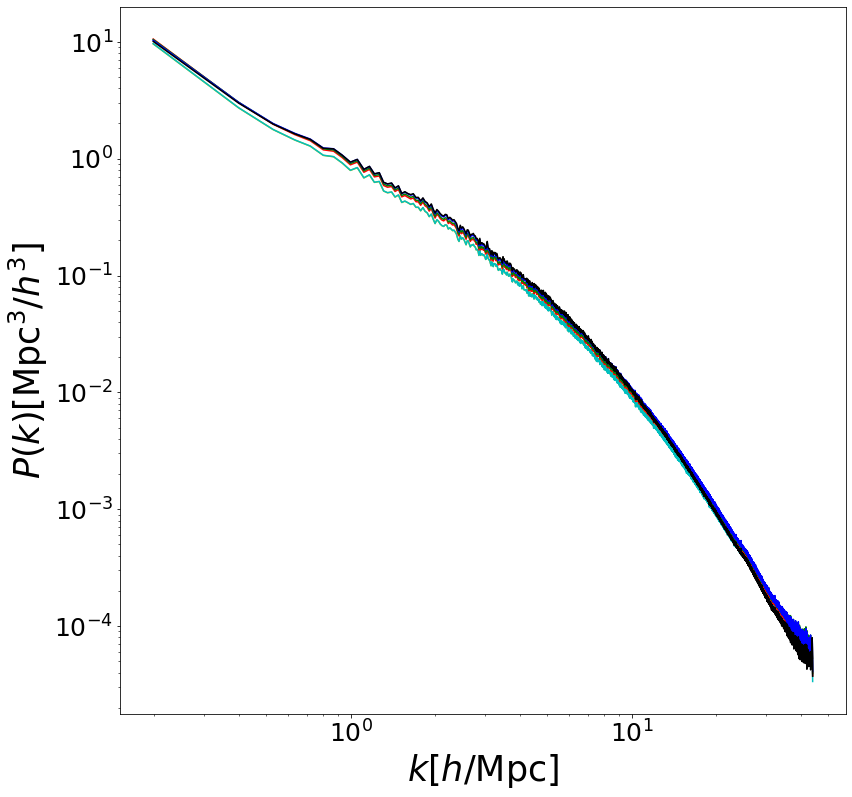

In [93]:
f = plt.figure(figsize=(13, 13))
plt.plot(k, proj_power_512, 'y-', label='sim512')
plt.plot(k, proj_power_256, 'c-', label='sim256')
plt.plot(k, proj_power_l1_1, 'r-', label='SR l1 1')
plt.plot(k, proj_power_l1_10, 'g-', label='SR l1 10')
plt.plot(k, proj_power_l1_100, 'b-', label='SR l1 100')
plt.plot(k, proj_power_l1_1000, 'k-', label='SR l1 1000')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$k[h/\mathrm{Mpc}]$', fontsize=35)
plt.ylabel(r'$P(k)[\mathrm{Mpc}^3/h^3]$', fontsize=35)
plt.tick_params(labelsize=25)
plt.show()

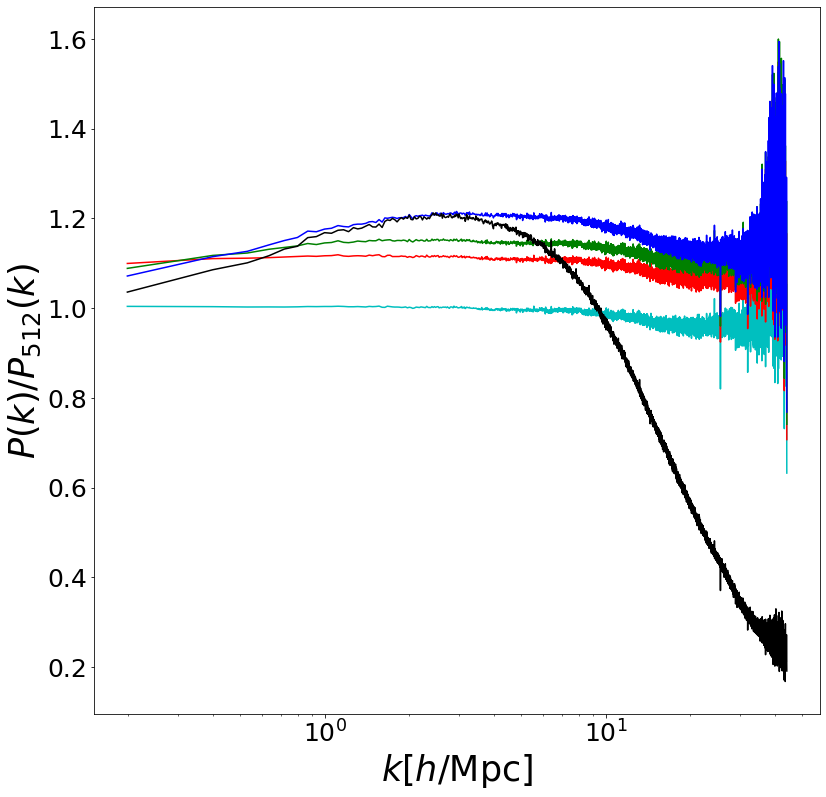

In [101]:
f = plt.figure(figsize=(13, 13))
plt.plot(k, proj_power_256/proj_power_512, 'c-', label='sim256')
plt.plot(k, proj_power_l1_1/proj_power_512, 'r-', label='SR l1 1')
plt.plot(k, proj_power_l1_10/proj_power_512, 'g-', label='SR l1 10')
plt.plot(k, proj_power_l1_100/proj_power_512, 'b-', label='SR l1 100')
plt.plot(k, proj_power_l1/proj_power_512, 'k-', label='SR l1 100')
#plt.plot(k, proj_power_l1_1000/proj_power_512, 'k-', label='SR l1 1000')
plt.xscale('log')
plt.xlabel(r'$k[h/\mathrm{Mpc}]$', fontsize=35)
plt.ylabel(r'$P(k)/P_{512}(k)$', fontsize=35)
plt.tick_params(labelsize=25)
#plt.legend()
plt.show()